
## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)




## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron (i.e. Neural Network)
    - Analyze and Compare
4. [Keras MMP](#Q3)


____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

____

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** A neuron is a unit that accepts input/features/data, and does calculations on it to create an output.

- **Input Layer:** A group of neurons that take in the initial data to be processed by the neural network.

- **Hidden Layer:** A group of neurons that take the outputs from the input layer, or another hidden layer, and does more calculating and updating to the data, and passes it on to the next neuron layer.

- **Output Layer:** The final group of neurons that take the processed inputs that have been through the neural network and outputs the prediction.

- **Activation:** A modeling function in each neuron layer that calculates an updated weight to pass on to the next neuron. You choose what kind of activation function to use in each layer, such as a sigmoid function for binary classification, softmax for multiclass classification, relu for a continuous differentiable, etc. 

- `Explain` how Back-propagation works 
- `Explain` how Gradient Descent works (mention the learning rate)
- `Explain` how Back-propagation and Gradient Descent are related   

Use your own words, but feel free to reference external materials for this question. 

**Back-propagation:** 
An important part of neural network training, back-propagation improves the individual weights between neurons as the model trains. Data enters the neural network in a feed forward direction, through the input layer first, hidden layers, and output layers last. When training with gradient descent, new weights are calculated by the loss function and sent back to update the weight via back-propagation, and tested and improved on again in the next batch or epoch. 

**Gradient Descent:** the process of finding the minimal error rate for the neural network. The function that finds this (J-theta) compares the predicted value against the actual value. It adjusts the weights by taking this error and using it to push the predictions closer to the true values. The increment the weights are updated in each batch is the **learning rate**, which is usually between 0-1.

**Back-propagation and Gradient Descent** work together like this: one batch of data goes through forward propagation in the neural network, where a gradient descent algorithm calculates the error between predicted and real values. The learning rate determines how much of that error to update the weights with, and through back-propagation, updates the weights for the next batch of data to be calculated on. 

Remember our Simple Perceptron Class from Monday. 

- Describe the process of making a prediction, i.e. how do you go from inputs to outputs?

**How a Neural Network makes a prediction:**
The Neural Network has three types of neuron layers: input, hidden, output. The neurons in each layers have parameters with assigned values, such as input dimensions, and activation function. The model is also compiled, where you can assign other hyperparameters such as optimization function, and loss function. As the data enters a neuron, the neural network assigns a weight and a bias to the connection from one neuron to the next neuron in the next layer. The inputs are multiplied with the weights, added to the bias, and go through the activation function. The output is sent to the next neuron in the chain. The weights are initialized randomly, but updated and improved as the data trains in batches and epochs. The output layer makes the prediction, and will have benefited from the training process and achieved its highest accuracy and lowest loss error.  


<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using `Keras`. After you build these two models, compare the results of the model.

In [1]:
"""
Our Dataset
"""
import numpy as np


rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [2]:
X.shape

(300, 2)

In [3]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

### Simple Perceptron
Construct a simple perceptron using Keras. 

Make sure to include the following in your model:
- Add `1 dense layer` with a `single neuron` 
- Use a `sigmoid activation function`
- Set `epochs` to 10 
- Use the version of `crossentropy loss` that is appropriate for this data.

Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 


In [4]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# build and fit model

model1 = Sequential()
model1.add(Dense(units=1, activation='sigmoid'))

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')

h1 = model1.fit(X, y,
                epochs=10,
                batch_size=32,
                validation_split=.2)

Epoch 1/10
8/8 [==============================] - 1s 52ms/step - loss: 0.7113 - accuracy: 0.5387 - val_loss: 0.8050 - val_accuracy: 0.4167
Epoch 2/10
8/8 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.5649 - val_loss: 0.8034 - val_accuracy: 0.4167
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 0.7063 - accuracy: 0.5290 - val_loss: 0.8016 - val_accuracy: 0.4167
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 0.7153 - accuracy: 0.5452 - val_loss: 0.8000 - val_accuracy: 0.4333
Epoch 5/10
8/8 [==============================] - 0s 6ms/step - loss: 0.7193 - accuracy: 0.5331 - val_loss: 0.7983 - val_accuracy: 0.4333
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 0.6960 - accuracy: 0.5565 - val_loss: 0.7967 - val_accuracy: 0.4333
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 0.7000 - accuracy: 0.5455 - val_loss: 0.7950 - val_accuracy: 0.4333
Epoch 8/10
8/8 [=================

In [5]:
# Visible test
assert len(model1.get_config()["layers"]) == 2, "Make sure you only create 1 Dense layer."
assert len(h1.epoch) <=10, "Did you make sure to set epochs to 10 or less?"

In [6]:
model1.get_config()["layers"]

[{'class_name': 'InputLayer',
  'config': {'batch_input_shape': (None, 2),
   'dtype': 'float32',
   'name': 'dense_input',
   'ragged': False,
   'sparse': False}},
 {'class_name': 'Dense',
  'config': {'activation': 'sigmoid',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'GlorotUniform',
    'config': {'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense',
   'trainable': True,
   'units': 1,
   'use_bias': True}}]

In [7]:
# Hidden tests - you will see the results when you submit to Canvas

### Multi-Layer Perceptron
Now construct a multi-layer perceptron model (also known as a neural network). 

Your neural network `must` have: 
- `2` Hidden Layers
- Select any number between `5-32` for the number of neurons in each hidden layers
- Your pick of activation function and optimizer
- Incorporate the `Callback function` below into your model
- Set epochs to `100`
- Your model should be called `model2` 
- Save the results of your fit statement to a variable called `h2`. 
- Use the version of `crossentropy loss` that is appropriate for this data.

In [8]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        # if model reaches 99% accuracy, training is terminated 
        acc_threshold = 0.99
        if(logs.get('accuracy') > acc_threshold):   
            self.model.stop_training = True
            self.model.callback_used = True

In [9]:
# build and fit model

model2 = Sequential()
model2.add(Dense(units=32, input_dim=2, activation='relu'))
model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=1, activation='sigmoid'))

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy')

h2 = model1.fit(X, y,
                epochs=100,
                batch_size=32,
                validation_split=.2,
                callbacks=[myCallback()])

Epoch 1/100
8/8 [==============================] - 0s 11ms/step - loss: 0.7004 - accuracy: 0.5458 - val_loss: 0.7895 - val_accuracy: 0.4333
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6999 - accuracy: 0.5458 - val_loss: 0.7882 - val_accuracy: 0.4333
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6994 - accuracy: 0.5500 - val_loss: 0.7869 - val_accuracy: 0.4333
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6989 - accuracy: 0.5542 - val_loss: 0.7856 - val_accuracy: 0.4333
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6984 - accuracy: 0.5542 - val_loss: 0.7842 - val_accuracy: 0.4333
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6979 - accuracy: 0.5542 - val_loss: 0.7827 - val_accuracy: 0.4333
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6973 - accuracy: 0.5583 - val_loss: 0.7815 - val_accuracy: 0.4333
Epoch 8/100
8/8 [=========

In [10]:
# Visible test
assert len(model2.get_config()["layers"]) == 4, "You should have 4 layers: Input, hidden 1, hidden 2, output."
assert 5 <= model2.get_config()["layers"][1]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 1, but don't."
assert 5 <= model2.get_config()["layers"][2]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 2, but don't."
assert h2.params["epochs"] == 100, "You didn't set epochs to 100."

In [11]:
# Hidden tests - you will see the results when you submit to Canvas

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. 

Install the package `mlxtend` into the environment you are using for the sprint challenge.

You can install this package using the following statement in the terminal

```python
pip install mlxtend
```

Or you can install this package using the following statement in your notebook

```python
!pip install mlxtend
```

If you choose to install this package from within your notebook, be sure to delete the install statement afterwards so that CodeGrade doesn't try to install it and potentially crash. 


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [12]:
# !pip install mlxtend

In [13]:
X.shape, y.shape

((300, 2), (300,))

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


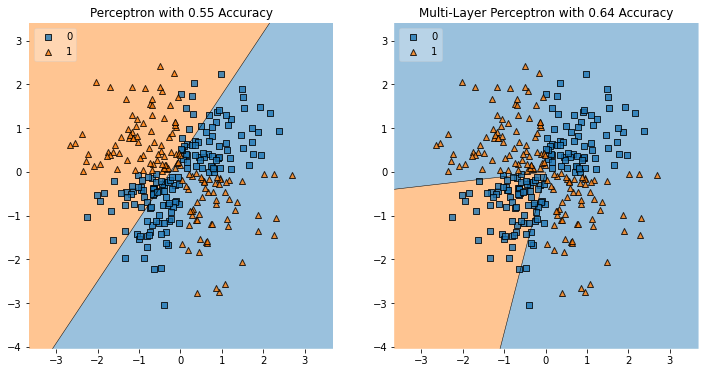

In [14]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(12,6))

for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show();

1) Why does the Perceptron (`model1`) only achieve about 50% accuracy? 

2) What is the architectural property of the Multi-Layer Perceptron that allows it to more accurately learn the relationship between X and y? 
- Hint: recall that each layer represents a vector space and they usually have a different number of dimensions, $\mathbb{R}^N$.
   

The perceptron didn't have any hidden layers, so the best model is can make is a logistic regression along linear classes. From the graph, you can see it attempts to draw a line through the data to determine the classes. However, the classes in this data would be better separated by 2 lines, not 1. 

The multi-layer perceptron predicts better because hidden layers can model non-linear data. It can do more complex calculations and gather nuance on predicting. Each layer has a activation function that can manipulate the vector space to help the model's ability to separate the classes with a hyperplane. With training, it can continually forward and back propagate to improve the weights and vector space until accuracy and minimal loss are achieved.

## 3. Keras MMP <a id="Q3"></a>

- Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- Train your model and report its baseline accuracy. 
- Then `hyper-parameters tune two parameters each with no more than 2 values each`
    - Due to limited computational resources on CodeGrade `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE`
- Report your optimized model's accuracy
- Use the Heart Disease Dataset provided (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network.
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyper-parameters tune your model. 
    - **Use `n_jobs` = 1**
- When hyper-parameters tuning, show you work by adding code cells for each new experiment.
- Report the accuracy for each combination of hyper-parameters as you test them so that we can easily see which resulted in the highest accuracy.

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load data
data_path = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df = pd.read_csv(data_path)
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1


In [16]:
# Create an input matrix named 'X' store it in a 2D numpy array

# Create an output vector for the labels named 'Y', store it in 1D numpy array

X = np.array(df.drop(columns='target'))
Y = np.array(df['target'])

In [17]:
# Visible Testing
assert X.shape[0] == 303, "Did you drop/lose some rows in X? Did you properly load and split the data?"
assert X.shape[1] == 13, "Did you drop/lose some columns in X? Did you properly load and split the data?"
assert len(Y)== 303, "Did you drop/lose some rows in Y? Did you properly load and split the data?"

In [18]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [19]:
# Create a function named 'create_model' that returns a complied keras model -  required for KerasClassifier

def create_model():
  model = Sequential([
      Dense(128, input_dim=13, activation='relu'),
      Dense(64, activation='relu'),
      Dense(32, activation='relu'),
      Dense(1, activation='sigmoid')                
  ])

  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  
  return model

In [20]:
#Baseline model

baseline = create_model()
baseline.fit(X, Y,
             epochs=10,
             batch_size=32,
             validation_split=.2)

Epoch 1/10
8/8 [==============================] - 1s 28ms/step - loss: 2.1352 - accuracy: 0.4982 - val_loss: 1.0788 - val_accuracy: 0.5574
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 1.1034 - accuracy: 0.5202 - val_loss: 0.7777 - val_accuracy: 0.6721
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 0.8610 - accuracy: 0.5796 - val_loss: 0.5119 - val_accuracy: 0.7213
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 0.8291 - accuracy: 0.5003 - val_loss: 0.5509 - val_accuracy: 0.7049
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 0.7111 - accuracy: 0.5696 - val_loss: 0.5034 - val_accuracy: 0.7705
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 0.6440 - accuracy: 0.6590 - val_loss: 0.4448 - val_accuracy: 0.7869
Epoch 7/10
8/8 [==============================] - 0s 8ms/step - loss: 0.5934 - accuracy: 0.6732 - val_loss: 0.4289 - val_accuracy: 0.8033
Epoch 8/10
8/8 [=================

##The baseline accuracy to beat is .73

In [21]:
# Visible Testing
assert create_model().__module__ == 'tensorflow.python.keras.engine.sequential', "create_model should return a keras model that was created using the Sequential class."

In [22]:
# Pass 'create_model' into KerasClassifier, store KerasClassifier to a variable named 'model'

model = KerasClassifier(build_fn=create_model, verbose=1)

In [23]:
# Visible Testing
assert model.__module__ == 'tensorflow.python.keras.wrappers.scikit_learn', "model should be a instance of KerasClassifier."

In [24]:
# Define the grid search parameters inside a dictionary named 'param_grid' 
# Use 2 hyper-parameters with 2 possible values for each 

param_grid = {'batch_size': [32, 64],
              'epochs': [5, 50]}

In [25]:
assert len(param_grid.keys()) == 2, "Did you create a param dict with 2 hyper-parameters as keys?"

In [26]:
# Create Grid Search object and name it 'gs'
# Run Grid Search 

gs = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = gs.fit(X, Y)

Epoch 1/5
8/8 [==============================] - 0s 3ms/step - loss: 18.7375 - accuracy: 0.5877
Epoch 2/5
8/8 [==============================] - 0s 3ms/step - loss: 2.4259 - accuracy: 0.4786
Epoch 3/5
8/8 [==============================] - 0s 3ms/step - loss: 1.2962 - accuracy: 0.5754
Epoch 4/5
8/8 [==============================] - 0s 3ms/step - loss: 0.9602 - accuracy: 0.5398
Epoch 5/5
2/2 [==============================] - 0s 6ms/step - loss: 0.7183 - accuracy: 0.6066
Epoch 1/5
8/8 [==============================] - 0s 3ms/step - loss: 3.6109 - accuracy: 0.5608
Epoch 2/5
8/8 [==============================] - 0s 3ms/step - loss: 1.2551 - accuracy: 0.6499
Epoch 3/5
8/8 [==============================] - 0s 3ms/step - loss: 0.8202 - accuracy: 0.6464
Epoch 4/5
8/8 [==============================] - 0s 3ms/step - loss: 1.2996 - accuracy: 0.5460
Epoch 5/5
2/2 [==============================] - 0s 7ms/step - loss: 0.5726 - accuracy: 0.7541
Epoch 1/5
8/8 [==============================] - 

In [27]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.8018579244613647 using {'batch_size': 32, 'epochs': 50}
Means: 0.6332786858081818, Stdev: 0.08878535930382364 with: {'batch_size': 32, 'epochs': 5}
Means: 0.8018579244613647, Stdev: 0.02838502064625798 with: {'batch_size': 32, 'epochs': 50}
Means: 0.646612024307251, Stdev: 0.037876211481441636 with: {'batch_size': 64, 'epochs': 5}
Means: 0.7391256809234619, Stdev: 0.050438508297470715 with: {'batch_size': 64, 'epochs': 50}
